<a href="https://colab.research.google.com/github/Geerford/data-science-ipynb/blob/master/Linear%20regression/Pytorch_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import torch

In [ ]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        return self.fc2(self.act1(self.fc1(x)))

In [ ]:
def predict(net, x, y):
    _y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), _y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.show()


def loss(pred, target):
    squares = abs(pred - target) #** 2
    return squares.mean()

# Изначальное распределение

Text(0.5, 1.0, '$y = sin(x)$')

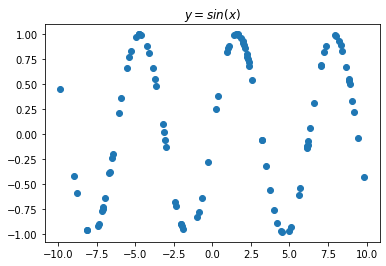

In [ ]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0
y_train = torch.sin(x_train)
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$')

# Шум

Text(0.5, 1.0, 'Gaussian noise')

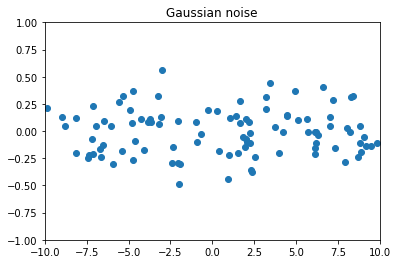

In [ ]:
noise = torch.randn(y_train.shape) / 5.
plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise')

# Добавление шума

Text(0, 0.5, 'y_train')

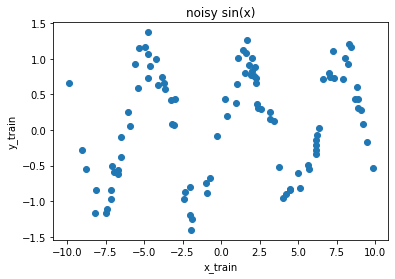

In [ ]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train')

# Валидационное множество

Text(0, 0.5, 'y_validation')

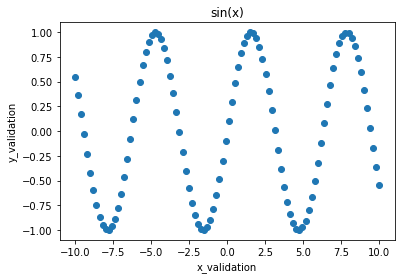

In [ ]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation')

Перевод одномерного тензора в двумерный (строку в столбец).

Каждый элемент соответствует одной точке

In [ ]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

# Применение модели

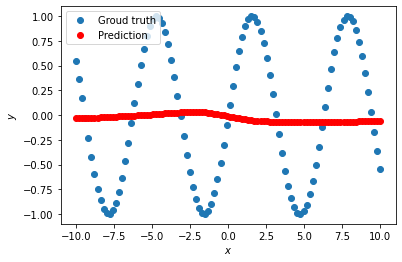

In [ ]:
sine_net = SineNet(50)
predict(sine_net, x_validation, y_validation)
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

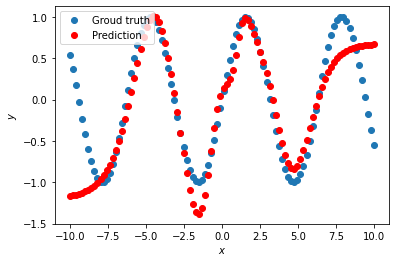

In [ ]:
for epoch_index in range(2000):
    optimizer.zero_grad()
    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)
    loss_val.backward()
    optimizer.step()

predict(sine_net, x_validation, y_validation)